https://scikit-learn.org/stable/modules/clustering.html

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from sklearn.cluster import KMeans
from sklearn import decomposition

In [174]:
attacks = ['fgsm', 'bim', 'pgd', 'std/8_255', 'df', 'cw']

In [175]:
characteristics_adv_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/gauss/LID/characteristics_adv'
characteristics_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/gauss/LID/characteristics'

In [176]:
characteristics = torch.load(characteristics_pth)[:1000]

In [177]:
NR_SAMPLES = 100
data_clean = []
data_adv = []

for att in attacks:
    characteristics_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/characteristics'.format(att)
    characteristics_adv_pth = '../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LID/characteristics_adv'.format(att)
    data_adv.append( torch.load(characteristics_pth)[:NR_SAMPLES] )
    data_clean.append( torch.load(characteristics_adv_pth)[:NR_SAMPLES] )

In [110]:
X_clean = np.concatenate(data_clean, axis=0)
X_adv   = np.concatenate(data_adv,   axis=0)
pca = decomposition.PCA(n_components=2)

In [111]:
X_adv.shape

(600, 13)

In [112]:
def create_figure(dat_adv, dat_clean, att='gauss', NR_SAMPLES=100):
    """
    
    """
    
    # dict_attacks = {'gauss' : 0, 'fgsm' : 1, 'bim': 2, 'pgd': 3, 'aa': 4, 'df': 5, 'cw': 6}
    cdict        = {0: 'black', 1: 'blue', 2: 'red', 3: 'green', 4: 'cyan', 5: 'orange', 6: 'purple'}
    
    dict_attacks = {'fgsm' : 0, 'bim' : 1, 'pgd': 2, 'aa': 3, 'df': 4, 'cw': 5}
    # cdict        = {0: 'blue', 1: 'red', 2: 'green', 3: 'cyan', 4: 'orange', 5: 'purple'}
    
    X = np.concatenate( [ dat_adv[ dict_attacks[att] ],  dat_clean[ dict_attacks[att] ] ] , axis=0 )
   
    pca = decomposition.PCA(n_components=2)
    Kmean = KMeans(n_clusters=2)

    pca.fit( X )
    X_tmp = pca.transform( X )
    Kmean.fit(X_tmp)
    y_kmeans = Kmean.predict(X_tmp)

    centroids = Kmean.cluster_centers_
    print(centroids)

    fig = plt.figure()
    plt.title( "Centroids of k-means clustering, {} samples".format(NR_SAMPLES) )

    plt.scatter(X_tmp[           :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0], s=1)
    plt.scatter(X_tmp[ NR_SAMPLES:NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks[att]+1], s=1)

    plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
    plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label=att, c=cdict[dict_attacks[att]+1]  )

    # plt.legend(y_kmeans)
    plt.xlabel("PCA 0")
    plt.ylabel("PCA 1")
    plt.legend(framealpha=0.5)
    
    return plt

In [113]:
attname='gauss'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

KeyError: 'gauss'

[[-10.966502     0.70823383]
 [ 11.644829    -0.7520299 ]]


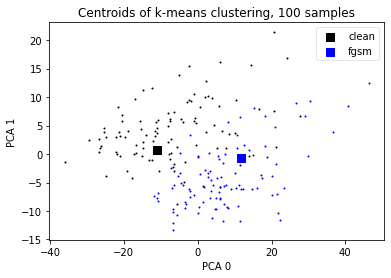

In [114]:
attname='fgsm'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[-9.86571    -0.64207315]
 [10.268398    0.668277  ]]


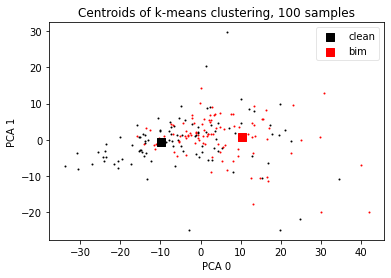

In [86]:
attname='bim'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[12.439981    0.32515022]
 [-8.293315   -0.21676895]]


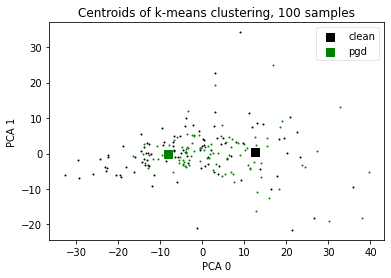

In [87]:
attname='pgd'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[-11.088725   -1.245485 ]
 [  9.637864    1.0825268]]


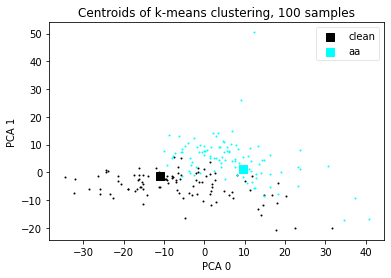

In [103]:
attname='aa'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[ 12.684678     0.33099848]
 [-10.378372    -0.27083504]]


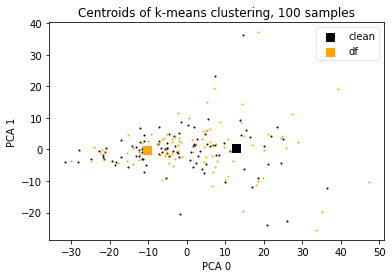

In [88]:
attname='df'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight')

[[-9.565348   -0.36428708]
 [12.679669    0.48288548]]


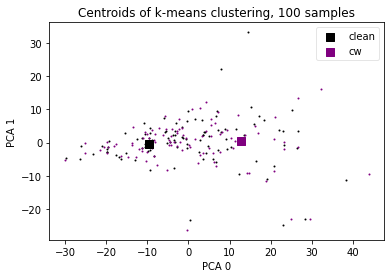

In [89]:
attname='cw'
plt1 = create_figure(data_adv, data_clean, att=attname)
plt1.savefig("plots/kmeans/{}.png".format(attname), bbox_inches='tight')

In [90]:
# X_clean = np.concatenate(data_clean, axis=0)
X = np.concatenate([data_clean[0]] + data_adv,   axis=0)
X.shape

(700, 13)

In [91]:
attacks = ['clean', 'gauss', 'fgsm', 'bim', 'pgd', 'aa', 'df', 'cw']

In [92]:
len(data_adv)

6

In [93]:
pca   = decomposition.PCA(n_components=2)
Kmean = KMeans(n_clusters=len(attacks))

pca.fit( X )
X_tmp = pca.transform( X )
Kmean.fit(X_tmp)
y_kmeans = Kmean.predict(X_tmp)

centroids = Kmean.cluster_centers_

In [94]:
centroids

array([[ -4.1237903 ,   1.9485962 ],
       [-12.165687  ,   0.14574166],
       [ 24.021456  ,  -6.833729  ],
       [  4.1655483 ,  -7.1741447 ],
       [ 18.37861   ,   8.506686  ],
       [-22.369673  ,  -2.045784  ],
       [  5.3459306 ,   3.9827657 ],
       [  9.172169  ,  29.89129   ]], dtype=float32)

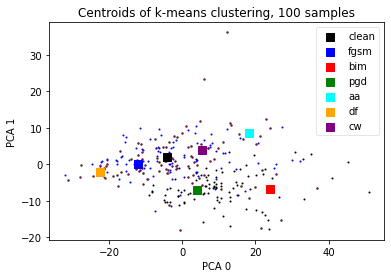

In [102]:
dict_attacks = { 'clean': 0, 'gauss' : 1, 'fgsm' : 2, 'bim': 3, 'pgd': 4, 'aa': 5, 'df': 6, 'cw': 7}
cdict        = {0: 'black', 1: 'pink', 2: 'blue', 3: 'red', 4: 'green', 5: 'cyan', 6: 'orange', 7: 'purple'}

plt.figure()
plt.title( "Centroids of k-means clustering, {} samples".format(NR_SAMPLES) )



plt.scatter(X_tmp[             :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0], s=1)
plt.scatter(X_tmp[ NR_SAMPLES  :NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks['fgsm']], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*2:NR_SAMPLES*3, 0], X_tmp[NR_SAMPLES*2:NR_SAMPLES*3, 1], c=cdict[dict_attacks['bim'] ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*3:NR_SAMPLES*4, 0], X_tmp[NR_SAMPLES*3:NR_SAMPLES*4, 1], c=cdict[dict_attacks['pgd']  ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*4:NR_SAMPLES*5, 0], X_tmp[NR_SAMPLES*4:NR_SAMPLES*5, 1], c=cdict[dict_attacks['aa']  ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*5:NR_SAMPLES*6, 0], X_tmp[NR_SAMPLES*5:NR_SAMPLES*6, 1], c=cdict[dict_attacks['df']   ], s=1)
plt.scatter(X_tmp[ NR_SAMPLES*6:NR_SAMPLES*7, 0], X_tmp[NR_SAMPLES*6:NR_SAMPLES*7, 1], c=cdict[dict_attacks['cw']   ], s=1)


plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label='fgsm', c=cdict[dict_attacks['fgsm']]  )
plt.scatter(centroids[2,0], centroids[2,1], s=50,  marker='s', label='bim', c=cdict[dict_attacks['bim']]  )
plt.scatter(centroids[3,0], centroids[3,1], s=50,  marker='s', label='pgd', c=cdict[dict_attacks['pgd']]  )
plt.scatter(centroids[4,0], centroids[4,1], s=50,  marker='s', label='aa', c=cdict[dict_attacks['aa']]  )
plt.scatter(centroids[5,0], centroids[5,1], s=50,  marker='s', label='df', c=cdict[dict_attacks['df']]  )
plt.scatter(centroids[6,0], centroids[6,1], s=50,  marker='s', label='cw', c=cdict[dict_attacks['cw']]  )



# plt.scatter(X_tmp[             :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0], s=1)
# # plt.scatter(X_tmp[ NR_SAMPLES  :NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks['gauss']], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*2:NR_SAMPLES*3, 0], X_tmp[NR_SAMPLES*2:NR_SAMPLES*3, 1], c=cdict[dict_attacks['fgsm'] ], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*3:NR_SAMPLES*4, 0], X_tmp[NR_SAMPLES*3:NR_SAMPLES*4, 1], c=cdict[dict_attacks['bim']  ], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*4:NR_SAMPLES*5, 0], X_tmp[NR_SAMPLES*4:NR_SAMPLES*5, 1], c=cdict[dict_attacks['pgd']  ], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*5:NR_SAMPLES*6, 0], X_tmp[NR_SAMPLES*5:NR_SAMPLES*6, 1], c=cdict[dict_attacks['aa']   ], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*6:NR_SAMPLES*7, 0], X_tmp[NR_SAMPLES*6:NR_SAMPLES*7, 1], c=cdict[dict_attacks['df']   ], s=1)
# plt.scatter(X_tmp[ NR_SAMPLES*7:NR_SAMPLES*8, 0], X_tmp[NR_SAMPLES*7:NR_SAMPLES*8, 1], c=cdict[dict_attacks['cw']   ], s=1)

# plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
# # plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label='gauss', c=cdict[dict_attacks['gauss']]  )
# plt.scatter(centroids[2,0], centroids[2,1], s=50,  marker='s', label='fgsm', c=cdict[dict_attacks['fgsm']]  )
# plt.scatter(centroids[3,0], centroids[3,1], s=50,  marker='s', label='bim', c=cdict[dict_attacks['bim']]  )
# plt.scatter(centroids[4,0], centroids[4,1], s=50,  marker='s', label='pgd', c=cdict[dict_attacks['pgd']]  )
# plt.scatter(centroids[5,0], centroids[5,1], s=50,  marker='s', label='aa', c=cdict[dict_attacks['aa']]  )
# plt.scatter(centroids[6,0], centroids[6,1], s=50,  marker='s', label='df', c=cdict[dict_attacks['df']]  )
# plt.scatter(centroids[7,0], centroids[7,1], s=50,  marker='s', label='cw', c=cdict[dict_attacks['cw']]  )

plt.xlabel("PCA 0")
plt.ylabel("PCA 1")
plt.legend(framealpha=0.5)

plt.savefig("plots/kmeans/{}.png".format("all"),  bbox_inches='tight')

In [186]:
def create_figure_clusters(dat_adv, dat_clean, att='gauss', NR_CLUSTER=5, NR_SAMPLES=100):
    """
    
    """
    
    # dict_attacks = {'gauss' : 0, 'fgsm' : 1, 'bim': 2, 'pgd': 3, 'aa': 4, 'df': 5, 'cw': 6}
    cdict        = {0: 'black', 1: 'blue', 2: 'red', 3: 'green', 4: 'cyan', 5: 'orange', 6: 'purple'}
    
    dict_attacks = {'fgsm' : 0, 'bim' : 1, 'pgd': 2, 'aa': 3, 'df': 4, 'cw': 5}
    # cdict        = {0: 'blue', 1: 'red', 2: 'green', 3: 'cyan', 4: 'orange', 5: 'purple'}
    
    X = np.concatenate( [ dat_adv[ dict_attacks[att] ],  dat_clean[ dict_attacks[att] ] ] , axis=0 )
    
    print("X.shape", X.shape)
   
    pca = decomposition.PCA(n_components=2)
    Kmean = KMeans(n_clusters=NR_CLUSTER)
    
    X_tmp = X
    
    pca.fit( X_tmp )
    X_tmp = pca.transform( X_tmp )
    Kmean.fit(X_tmp)
    y_kmeans = Kmean.predict(X_tmp)
    
    print(y_kmeans, len(y_kmeans))

    centroids = Kmean.cluster_centers_
    print(centroids)

    fig = plt.figure()
    plt.title( "Centroids of k-means clustering, {} samples".format(NR_SAMPLES) )
    
    print( X_tmp.shape )
    plt.scatter(X_tmp[           :,   0], X_tmp[          :,   1], c=y_kmeans,                   s=1)
    
    plt.scatter(X_tmp[           :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=y_kmeans[:NR_SAMPLES],                s=20, marker="v",  label='clean')
    plt.scatter(X_tmp[ NR_SAMPLES:NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2],    s=20, marker="o",  label=att)
    # if att == 'fgsm':
    #     plt.scatter(X_tmp[ NR_SAMPLES:NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # elif att == 'bim':
    #     plt.scatter(X_tmp[ NR_SAMPLES*2:NR_SAMPLES*3, 0], X_tmp[NR_SAMPLES*2:NR_SAMPLES*3, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # elif att == 'pgd':
    #     plt.scatter(X_tmp[ NR_SAMPLES*3:NR_SAMPLES*4, 0], X_tmp[NR_SAMPLES*3:NR_SAMPLES*4, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # elif att == 'aa':
    #     plt.scatter(X_tmp[ NR_SAMPLES*4:NR_SAMPLES*5, 0], X_tmp[NR_SAMPLES*4:NR_SAMPLES*5, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # elif att == 'df':
    #     plt.scatter(X_tmp[ NR_SAMPLES*5:NR_SAMPLES*6, 0], X_tmp[NR_SAMPLES*5:NR_SAMPLES*6, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # elif att == 'cw':
    #     plt.scatter(X_tmp[ NR_SAMPLES*6:NR_SAMPLES*7, 0], X_tmp[NR_SAMPLES*6:NR_SAMPLES*7, 1], c=y_kmeans[NR_SAMPLES:NR_SAMPLES*2], s=20, marker="o",  label=att)
    # plt.scatter(X_tmp[           :NR_SAMPLES,   0], X_tmp[          :NR_SAMPLES,   1], c=cdict[0],                   s=1)
    # plt.scatter(X_tmp[ NR_SAMPLES:NR_SAMPLES*2, 0], X_tmp[NR_SAMPLES:NR_SAMPLES*2, 1], c=cdict[dict_attacks[att]+1], s=1)

    # plt.scatter(centroids[0,0], centroids[0,1], s=50,  marker='s', label='clean', c=cdict[0]  )
    # plt.scatter(centroids[1,0], centroids[1,1], s=50,  marker='s', label=att, c=cdict[dict_attacks[att]+1]  )

    # plt.legend(y_kmeans)
    plt.xlabel("PCA 0")
    plt.ylabel("PCA 1")
    plt.legend(framealpha=0.5)
    
    return plt

X.shape (200, 13)
[2 2 4 1 2 0 2 0 0 0 0 2 2 0 0 4 0 4 4 2 0 0 3 2 3 2 0 2 2 1 4 0 0 0 2 2 0
 0 2 2 2 2 3 1 2 4 0 0 2 0 2 0 3 0 4 2 2 1 0 2 1 2 2 0 4 0 2 4 3 0 4 4 0 2
 2 2 2 3 4 2 2 2 0 2 2 2 0 2 2 2 2 4 1 2 2 0 2 2 2 1 4 3 3 1 3 4 4 3 1 1 3
 0 4 3 3 3 3 3 3 3 3 1 3 3 3 4 3 3 4 1 3 3 3 3 4 3 0 3 4 4 4 4 1 1 4 3 3 3
 0 3 4 3 3 3 3 3 4 1 3 4 1 4 4 3 3 3 4 3 1 1 3 3 3 4 3 4 4 3 3 4 3 4 3 4 4
 4 3 4 4 4 4 3 3 3 3 3 4 3 4 1] 200
[[ -0.47347793   7.50987   ]
 [ 25.20602      7.6769786 ]
 [-18.669495     2.7414367 ]
 [  9.919876    -4.556867  ]
 [ -4.642446    -5.348594  ]]
(200, 2)


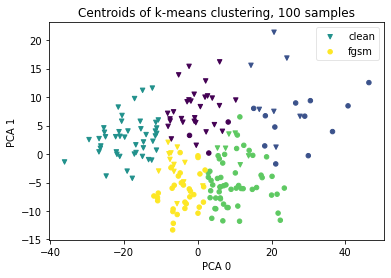

In [187]:
attname='fgsm'
plt1 = create_figure_clusters(data_adv, data_clean, att=attname, NR_CLUSTER=5, NR_SAMPLES=100)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight', dpi=300)

X.shape (200, 13)
[0 2 2 2 0 0 4 2 0 0 2 4 0 4 4 1 4 0 2 0 0 2 2 3 0 1 0 0 4 1 0 2 0 0 2 0 0
 4 4 4 0 1 1 2 1 0 2 0 0 2 0 2 2 2 4 0 0 1 0 0 0 0 3 0 0 2 0 2 2 2 2 0 0 0
 2 2 3 0 2 2 2 0 2 2 0 2 0 2 2 2 1 4 2 4 0 0 0 1 1 4 1 0 0 0 1 0 1 0 0 0 0
 4 0 4 4 4 4 4 0 1 4 0 0 3 0 1 0 0 4 1 0 0 0 0 0 0 0 4 4 0 4 1 1 0 1 0 0 4
 0 2 0 0 0 2 4 0 4 1 0 0 1 0 3 4 4 2 0 2 0 0 0 4 0 0 2 0 3 1 0 2 0 1 2 0 1
 0 0 1 0 0 4 4 2 4 0 0 0 1 1 4] 200
[[ -2.1387186   2.4771001]
 [  8.132185   -6.944167 ]
 [-17.866833   -2.687588 ]
 [ 31.805553  -17.43173  ]
 [ 15.261787    5.128839 ]]
(200, 2)


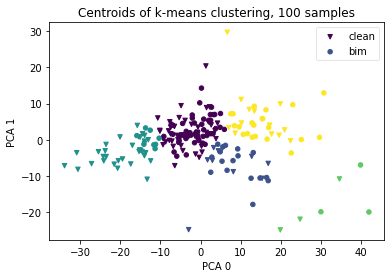

In [188]:
attname='bim'
plt1 = create_figure_clusters(data_adv, data_clean, att=attname, NR_CLUSTER=5, NR_SAMPLES=100)
plt1.savefig("plots/kmeans/{}.png".format(attname),  bbox_inches='tight', dpi=300)